# **1. Implementation of Single Layer Perceptron (SLP)**

**(a) Download iris data from UCI web repository.**

In [147]:
import pandas as pd

dataSet=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None);
dataSet.columns=['Sepal-length(cm)','Sepal-width(cm)','Petal-length(cm)','Petal-width(cm)','Class']
dataSet

,Sepal-length(cm),Sepal-width(cm),Petal-length(cm),Petal-width(cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**(b) Read the data: input features in one variable and class labels into another in a vector
form suitable for a neural network class label representation**

In [148]:
X=dataSet[['Sepal-length(cm)','Sepal-width(cm)','Petal-length(cm)','Petal-width(cm)']]
Y=dataSet['Class']

print(X)
print(Y)

#making dataset linearly seperable here. To do so Iris-versicolor and Iris-virginica class are selected with labels as 1 and -1 respectively.

X=X.to_numpy()
Y=Y.to_numpy()
x=X[50:150]
y=Y[50:150]
y=[(1 if i=='Iris-versicolor' else -1)for i in y]

Y1=[(1 if i=='Iris-setosa' else -1)for i in Y]
Y2=[(1 if i=='Iris-versicolor' else -1)for i in Y]
Y3=[(1 if i=='Iris-virginica' else -1)for i in Y]


     Sepal-length(cm)  Sepal-width(cm)  Petal-length(cm)  Petal-width(cm)
0                 5.1              3.5               1.4              0.2
1                 4.9              3.0               1.4              0.2
2                 4.7              3.2               1.3              0.2
3                 4.6              3.1               1.5              0.2
4                 5.0              3.6               1.4              0.2
..                ...              ...               ...              ...
145               6.7              3.0               5.2              2.3
146               6.3              2.5               5.0              1.9
147               6.5              3.0               5.2              2.0
148               6.2              3.4               5.4              2.3
149               5.9              3.0               5.1              1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa


**(c) Randomly select training and the test set: x% (begin with x=10) data from each class
for training and all the rest for testing**

In [149]:
from sklearn.model_selection import train_test_split

#training size=10%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

**(d) Compute training and testing accuracy using SLP for 10 independent simulations and
store the results from the individual simulations programmatically in an excel sheet**

In [150]:
import numpy as np

#class is created for SLP and its related functions
class SLP():
  rate=0.01
  iterNo=250
  w=[]
  misclass=[]

  def fit(self,x,y):

    self.w=np.zeros(1+x.shape[1])
    self.misclass=[]
    for i in range(self.iterNo):
      err=0
      for xi,yi in zip(x,y):
        dW=self.rate*(yi-self.pred(xi))
        self.w[1:]+=dW*xi
        self.w[0]+=dW
        err+=int(dW!=0.0)
      self.misclass.append(err)
    
  def aggSampleVal(self,x):
      return np.dot(x, self.w[1:])+self.w[0]

  def pred(self,x):
      return np.where(self.aggSampleVal(x) >= 0.0, 1, -1)

  def accuracy(self,realTarget,predTarget):
    c=0
    for i in range(len(realTarget)):
      if realTarget[i]==predTarget[i]:
        c+=1
    return c/float(len(realTarget))*100.0


In [151]:

slp=SLP()

accTrain=[]
accTest=[]
#over 10 simulations for 10% training set size
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=None)
    #training accuracy over 10 sims
    slp.fit(x_train, y_train)
    accTrain.append(slp.accuracy(y_test, slp.pred(x_test)))
    #testing accuracy over 10 sims
    slp.fit(x_test,y_test)
    accTest.append(slp.accuracy(y_train, slp.pred(x_train)))

avgTrainAcc=sum(accTrain)/len(accTrain)
avgTestAcc=sum(accTest)/len(accTest)
print('Training Accuracy : ',avgTrainAcc)
print('Testing Accuracy : ',avgTestAcc)

#data of simulation to be stored in excel sheet in /content directory
dataForExcel=pd.DataFrame(data={'Training Acc.':accTrain,'Testing Acc.':accTest})

dataForExcel.to_excel("/content/10%trainingSizeAnd10sim.xlsx")

#reading same data that is stored above
dataFromExcel=pd.read_excel("/content/10%trainingSizeAnd10sim.xlsx",index_col=0)

print("\nData read from saved Excel Sheet is :- ")
dataFromExcel

Training Accuracy :  89.88888888888889
Testing Accuracy :  92.0

Data read from saved Excel Sheet is :- 


,Training Acc.,Testing Acc.
0,94.444444,100
1,93.333333,100
2,73.333333,80
3,82.222222,90
4,93.333333,80
5,90.000000,90
6,90.000000,90
7,93.333333,100
8,92.222222,100
9,96.666667,90


In [165]:
#application of one vs. all strategy for multi class dataset

X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2, random_state=None)
X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=None)
X_train, X_test, Y3_train, Y3_test = train_test_split(X, Y3, test_size=0.2, random_state=None)

slp1=SLP()
slp1.fit(X_train,Y1_train)

slp2=SLP()
slp2.fit(X_train,Y2_train)

slp3=SLP()
slp3.fit(X_train,Y3_train)

def weightedVal(input,weight):
  sum=weight[0]
  for i in range(len(input)):
    sum+=input[i]*weight[i+1]
  return sum

def pred(input):
  
  v1=weightedVal(input,slp1.w)
  v2=weightedVal(input,slp2.w)
  v3=weightedVal(input,slp3.w)

  if v1>=v2 and v1>=v3:
    return 0
  
  if v2>=v1 and v2>=v3:
    return 1
  
  if v3>=v1 and v3>=v2:
    return 2

def acc(targets,inputs):
  c=0
  for yi,xi in zip(targets,inputs):
    if pred(xi)==yi:
      c+=1
  return (c/float(len(targets)))*100

_Y=[((0 if i=="Iris-setosa" else 1) if i!="Iris-virginica" else 2)for i in Y]
_, _X_test, _, _Y_test = train_test_split(X, _Y, test_size=0.2, random_state=None)

accTest=[]
#over 10 simulations accuracy
for i in range(10):
    accTest.append(acc(_Y_test,_X_test))

avgTestAcc=sum(accTest)/10
print('Avg. Testing Accuracy over 10 simulations : ',avgTestAcc)

Avg. Testing Accuracy over 10 simulations :  76.66666666666666


**(e) Compute training and testing accuracy by varying accuracy x (from 10% to 60%) as
the following and report overall training and testing accuracy (average over 10
simulations)**

In [170]:
#train size 10% done above
print('Avg. Training Accuracy at 10% training set size : ',avgTrainAcc)
print('Avg. Testing Accuracy at 10% training set size: ',avgTestAcc)
#10 simulations

#train size 20%
accTrain=[]
accTest=[]
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=None)
    #training accuracy over 10 sims
    slp.fit(x_train, y_train)
    accTrain.append(slp.accuracy(y_test, slp.pred(x_test)))
    #testing accuracy over 10 sims
    slp.fit(x_test,y_test)
    accTest.append(slp.accuracy(y_train, slp.pred(x_train)))

avgTrainAcc20=sum(accTrain)/len(accTrain)
avgTestAcc20=sum(accTest)/len(accTest)
print('\nAvg. Training Accuracy at 20% training set size : ',avgTrainAcc20)
print('Avg. Testing Accuracy at 20% training set size: ',avgTestAcc20)

#train size 30%
accTrain=[]
accTest=[]
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=None)
    #training accuracy over 10 sims
    slp.fit(x_train, y_train)
    accTrain.append(slp.accuracy(y_test, slp.pred(x_test)))
    #testing accuracy over 10 sims
    slp.fit(x_test,y_test)
    accTest.append(slp.accuracy(y_train, slp.pred(x_train)))

avgTrainAcc30=sum(accTrain)/len(accTrain)
avgTestAcc30=sum(accTest)/len(accTest)
print('\nAvg. Training Accuracy at 30% training set size : ',avgTrainAcc30)
print('Avg. Testing Accuracy at 30% training set size: ',avgTestAcc30)

#train size 40%
accTrain=[]
accTest=[]
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=None)
    #training accuracy over 10 sims
    slp.fit(x_train, y_train)
    accTrain.append(slp.accuracy(y_test, slp.pred(x_test)))
    #testing accuracy over 10 sims
    slp.fit(x_test,y_test)
    accTest.append(slp.accuracy(y_train, slp.pred(x_train)))

avgTrainAcc40=sum(accTrain)/len(accTrain)
avgTestAcc40=sum(accTest)/len(accTest)
print('\nAvg. Training Accuracy at 40% training set size : ',avgTrainAcc40)
print('Avg. Testing Accuracy at 40% training set size: ',avgTestAcc40)

#train size 50%
accTrain=[]
accTest=[]
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=None)
    #training accuracy over 10 sims
    slp.fit(x_train, y_train)
    accTrain.append(slp.accuracy(y_test, slp.pred(x_test)))
    #testing accuracy over 10 sims
    slp.fit(x_test,y_test)
    accTest.append(slp.accuracy(y_train, slp.pred(x_train)))

avgTrainAcc50=sum(accTrain)/len(accTrain)
avgTestAcc50=sum(accTest)/len(accTest)
print('\nAvg. Training Accuracy at 50% training set size : ',avgTrainAcc50)
print('Avg. Testing Accuracy at 50% training set size: ',avgTestAcc50)

#train size 60%
accTrain=[]
accTest=[]
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=None)
    #training accuracy over 10 sims
    slp.fit(x_train, y_train)
    accTrain.append(slp.accuracy(y_test, slp.pred(x_test)))
    #testing accuracy over 10 sims
    slp.fit(x_test,y_test)
    accTest.append(slp.accuracy(y_train, slp.pred(x_train)))

avgTrainAcc60=sum(accTrain)/len(accTrain)
avgTestAcc60=sum(accTest)/len(accTest)
print('\nAvg. Training Accuracy at 60% training set size : ',avgTrainAcc60)
print('Avg. Testing Accuracy at 60% training set size: ',avgTestAcc60)

accuracyDF= pd.DataFrame({'Amount of randomly selected training data in %':[10,20,30,40,50,60],
                          'Training accuracy (Average over 10 simulations)':[avgTrainAcc,avgTrainAcc20,avgTrainAcc30,avgTrainAcc40,avgTrainAcc50,avgTrainAcc60],
                          'Testing accuracy (Average over 10 simulations)':[avgTestAcc,avgTestAcc20,avgTestAcc30,avgTestAcc40,avgTestAcc50,avgTestAcc60]})

print("Tabular Form of Accuracy:-")
accuracyDF

Avg. Training Accuracy at 10% training set size :  89.88888888888889
Avg. Testing Accuracy at 10% training set size:  76.66666666666666

Avg. Training Accuracy at 20% training set size :  88.125
Avg. Testing Accuracy at 20% training set size:  92.0

Avg. Training Accuracy at 30% training set size :  91.14285714285714
Avg. Testing Accuracy at 30% training set size:  94.0

Avg. Training Accuracy at 40% training set size :  93.0
Avg. Testing Accuracy at 40% training set size:  92.5

Avg. Training Accuracy at 50% training set size :  93.2
Avg. Testing Accuracy at 50% training set size:  93.0

Avg. Training Accuracy at 60% training set size :  95.5
Avg. Testing Accuracy at 60% training set size:  94.33333333333334
Tabular Form of Accuracy:-


,Amount of randomly selected training data in %,Training accuracy (Average over 10 simulations),Testing accuracy (Average over 10 simulations)
0,10,89.888889,76.666667
1,20,88.125000,92.000000
2,30,91.142857,94.000000
3,40,93.000000,92.500000
4,50,93.200000,93.000000
5,60,95.500000,94.333333


**(f) Plot a graph keeping column 1 at x-axis and column 2 and 3 (at the same figure) at
the y-axis. Use curves of different colors to denote curves for column 2 and 3.**

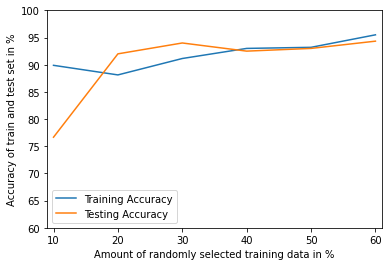

In [172]:
import matplotlib.pyplot as plt

plt.xlabel("Amount of randomly selected training data in %")
plt.ylabel("Accuracy of train and test set in %")
plt.ylim(60,100) 
plt.xlim(9,61)
plt.plot(accuracyDF["Amount of randomly selected training data in %"],accuracyDF["Training accuracy (Average over 10 simulations)"],label="Training Accuracy")
plt.plot(accuracyDF["Amount of randomly selected training data in %"],accuracyDF["Testing accuracy (Average over 10 simulations)"],label="Testing Accuracy")
plt.legend()
plt.show()

# **2. Classify the IRIS dataset using a multi-layer perceptron neural network. Repeat the same steps as mentioned in Question-1 using MLP.**

In [173]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split


dataSet=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None);
dataSet.columns=['Sepal-length(cm)','Sepal-width(cm)','Petal-length(cm)','Petal-width(cm)','Class']

x=dataSet[['Sepal-length(cm)','Sepal-width(cm)','Petal-length(cm)','Petal-width(cm)']].to_numpy()
y=dataSet['Class'].to_numpy()
y=[((0 if i=="Iris-setosa" else 1) if i!="Iris-virginica" else 2)for i in y]

In [174]:

class MLP(object):

  

  def __init__(self,iterNos,lr,nInputs=4,nOutputs=3):

    self.nInputs=nInputs
    self.nOutputs=nOutputs
    self.nHidden=self.nInputs+1

    self.NN=[]
    self.NN.append([{'weights': np.random.uniform(size=self.nInputs)} for i in range(self.nHidden)])
    self.NN.append([{'weights': np.random.uniform(size=self.nHidden)} for i in range(self.nOutputs)])

    self.iterNo=iterNos
    self.rate=lr



  def derivSigmoid(self,a):
    return a*(1-a)
  
  def forwardSigmoid(self,a):
    return 1/(1+math.exp(-a))

  def fit(self,x,y):

    for i in range(self.iterNo):
      for xi,yi in zip(x,y):
        outputs=self.forwardProp(xi)

        expected=[0.0 for i in range(self.nOutputs)]
        expected[yi]=1
        self.backProp(xi,expected)
        self.updateWeights(xi)
  
  def forwardProp(self,input):

    row=input

    for layer in self.NN:

      prev=np.array([])
      for neuron in layer:

        sum=neuron['weights'].T.dot(row)
        result=self.forwardSigmoid(sum)
        neuron['result']=result
        prev=np.append(prev,[result])

      row=prev
    
    return row

  def backProp(self,input,expected):
    row=input
    for i in reversed(range(len(self.NN))):

      layer=self.NN[i]
      errors=np.array([])

      if i==len(self.NN)-1:
        results=[neuron['result'] for neuron in layer]
        errors = expected-np.array(results) 
      else:
        for j in range(len(layer)):
          herror=0
          nextlayer=self.NN[i+1]
          for neuron in nextlayer:
              herror+=(neuron['weights'][j]*neuron['delta'])
          errors=np.append(errors,[herror])
            
      for j in range(len(layer)):
        neuron=layer[j]
        neuron['delta']=errors[j]*self.derivSigmoid(neuron['result'])

  def updateWeights(self,input):
    
    for i in range(len(self.NN)):
      inputs = input
      if i!=0:
          inputs=[neuron['result'] for neuron in self.NN[i-1]]

      for neuron in self.NN[i]:
        for j in range(len(inputs)):
          neuron['weights'][j]+=self.rate*neuron['delta']*inputs[j]

  def pred(self,input):
    outputs = self.forwardProp(input)
    return np.argmax(outputs)

  def accuracy(self,x,y):
    c=0
    for xi,yi in zip(x,y):
      if self.pred(xi)==yi:
        c+=1

    return (c/float(len(y)))*100



In [176]:
# default fit

mlp=MLP(400,0.05)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

mlp.fit(x_train,y_train)

acc=mlp.accuracy(x_test,y_test)

print("Accuracy with 80% training dataset : ",acc)

Accuracy with 80% training dataset :  96.66666666666667


In [177]:
#avg accuracy over 10 simulations
trainSize=[10,20,30,40,50,60]

avgTrainAcc=[]
avgTestAcc=[]

for t in trainSize:
  accTrain=0
  accTest=0
  print("---------------------",t,"% training size---------------------\n")
  for _ in range(10):

    mlp=MLP(200,0.1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-(t/100.0), random_state=None)
    mlp.fit(x_train,y_train)
    accTest+=mlp.accuracy(x_test,y_test)
    accTrain+=mlp.accuracy(x_train,y_train)
  accTest/=10
  accTrain/=10
  avgTestAcc.append(accTest)
  avgTrainAcc.append(accTrain)
  print("Average training accuracy over 10 simulations : ",accTrain)
  print("Average testing accuracy with over 10 simulations : ",accTest)
  print("\n")


accuracyDF= pd.DataFrame({'Amount of randomly selected training data in %':trainSize,
                          'Training accuracy (Average over 10 simulations)':avgTrainAcc,
                          'Testing accuracy (Average over 10 simulations)':avgTestAcc})

print("Tabular Form of Accuracy:-")
accuracyDF

--------------------- 10 % training size---------------------

Average training accuracy over 10 simulations :  72.0
Average testing accuracy with over 10 simulations :  59.25925925925926


--------------------- 20 % training size---------------------

Average training accuracy over 10 simulations :  80.00000000000001
Average testing accuracy with over 10 simulations :  74.83333333333334


--------------------- 30 % training size---------------------

Average training accuracy over 10 simulations :  84.44444444444444
Average testing accuracy with over 10 simulations :  80.57142857142857


--------------------- 40 % training size---------------------

Average training accuracy over 10 simulations :  86.16666666666667
Average testing accuracy with over 10 simulations :  81.55555555555556


--------------------- 50 % training size---------------------

Average training accuracy over 10 simulations :  94.26666666666668
Average testing accuracy with over 10 simulations :  93.06666666666666


,Amount of randomly selected training data in %,Training accuracy (Average over 10 simulations),Testing accuracy (Average over 10 simulations)
0,10,72.000000,59.259259
1,20,80.000000,74.833333
2,30,84.444444,80.571429
3,40,86.166667,81.555556
4,50,94.266667,93.066667
5,60,93.111111,93.500000


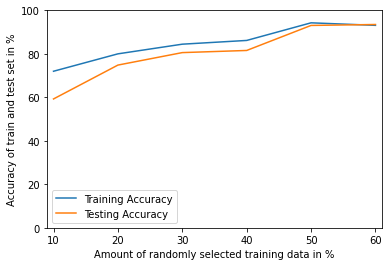

In [178]:
import matplotlib.pyplot as plt

plt.xlabel("Amount of randomly selected training data in %")
plt.ylabel("Accuracy of train and test set in %")
plt.ylim(0,100) 
plt.xlim(9,61)
plt.plot(accuracyDF["Amount of randomly selected training data in %"],accuracyDF["Training accuracy (Average over 10 simulations)"],label="Training Accuracy")
plt.plot(accuracyDF["Amount of randomly selected training data in %"],accuracyDF["Testing accuracy (Average over 10 simulations)"],label="Testing Accuracy")
plt.legend()
plt.show()